In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('NetflixDataset.csv', encoding='latin-1', index_col='Title')
df

,Genre,Tags,Languages,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,...,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,Summary,Series or Movie,IMDb Votes,Image
Title,,,,,,,,,,,,,,,,,,,,,
Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,7.9,...,57.0,"$21,22,065",12-Dec-08,04-03-2021,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,A med student with a supernatural gift tries t...,Series,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...
HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R,5.8,...,NaN,"$70,632",08-May-20,04-03-2021,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,"When nerdy Johanna moves to London, things get...",Movie,2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...
The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...","Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",NaN,7.4,...,NaN,NaN,03-Dec-20,03-03-2021,NaN,https://www.netflix.com/watch/81306155,After her ex-boyfriend cons her out of a large...,Movie,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...
Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Poland,< 30 minutes,NaN,NaN,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",NaN,7.5,...,4.0,NaN,14-Jun-11,03-03-2021,NaN,https://www.netflix.com/watch/81307527,A group of social welfare workers led by their...,Series,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...
Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",NaN,6.7,...,1.0,NaN,31-Oct-49,03-03-2021,NaN,https://www.netflix.com/watch/81382068,An unhappily married farm worker struggling to...,Movie,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13 Going on 30,"Comedy, Fantasy, Romance","Romantic Comedies,Comedies,Romantic Films,Roma...","English, Portuguese","Hungary,Lithuania,Romania,United Kingdom,Belgi...",1-2 hour,Gary Winick,"Josh Goldsmith, Cathy Yuspa","Andy Serkis, Jennifer Garner, Mark Ruffalo, Ju...",PG-13,6.2,...,11.0,"$5,72,31,747",23-Apr-04,14-04-2015,"Revolution Studios, Thirteen Productions LLC",https://www.netflix.com/watch/60034573,When a geeky teens birthday party goes awry an...,Movie,167842.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...
LIFE 2.0,Documentary,"Social & Cultural Documentaries,Biographical D...",English,"Hungary,Lithuania,India,Australia,United Kingd...",1-2 hour,Jason Spingarn-Koff,NaN,Teasa Copprue,NotRated,6.2,...,NaN,NaN,22-Jan-10,14-04-2015,NaN,https://www.netflix.com/watch/70129457,Computer users across the globe log onto the v...,Movie,878.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...
Brand New Day,"Documentary, Music","Australian Comedies,Romantic Comedies,Australi...",English,Australia,1-2 hour,Amos Gitai,NaN,"Ryuichi Sakamoto, Clem Burke, Annie Lennox, Pa...",NaN,7.3,...,NaN,NaN,17-Sep-88,14-04-2015,NaN,https://www.netflix.com/watch/70125340,In an idyllic port town on Australias west coa...,Movie,14.0,http://cdn1.nflximg.net/images/5543/12045543.jpg


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9403 entries, Lets Fight Ghost to DreamWorks Happy Holidays from Madagascar
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Genre                 9378 non-null   object 
 1   Tags                  9366 non-null   object 
 2   Languages             9233 non-null   object 
 3   Country Availability  9392 non-null   object 
 4   Runtime               9402 non-null   object 
 5   Director              7099 non-null   object 
 6   Writer                7596 non-null   object 
 7   Actors                9292 non-null   object 
 8   View Rating           6813 non-null   object 
 9   IMDb Score            9395 non-null   float64
 10  Awards Received       5213 non-null   float64
 11  Awards Nominated For  6363 non-null   float64
 12  Boxoffice             3743 non-null   object 
 13  Release Date          9196 non-null   object 
 14  Netflix Release Date  940

In [4]:
df.isnull().sum()

Genre                     25
Tags                      37
Languages                170
Country Availability      11
Runtime                    1
Director                2304
Writer                  1807
Actors                   111
View Rating             2590
IMDb Score                 8
Awards Received         4190
Awards Nominated For    3040
Boxoffice               5660
Release Date             207
Netflix Release Date       0
Production House        5021
Netflix Link               0
Summary                    5
Series or Movie            0
IMDb Votes                10
Image                      0
dtype: int64

In [5]:
df.index = df.index.str.title()

In [6]:
df.index

Index(['Lets Fight Ghost', 'How To Build A Girl', 'The Con-Heartist',
       'Gleboka Woda', 'Only A Mother', 'Snowroller', 'The Invisible',
       'The Simple Minded Murderer', 'To Kill A Child', 'Joker',
       ...
       'The Twilight Saga: Breaking Dawn: Part 1', 'One For The Money',
       '4.3.2.1', '13', 'District 13: Ultimatum', '13 Going On 30', 'Life 2.0',
       'Brand New Day', 'Daniel Arends: Blessuretijd',
       'Dreamworks Happy Holidays From Madagascar'],
      dtype='object', name='Title', length=9403)

In [7]:
df[df['Series or Movie']=='Movie'].size

146769

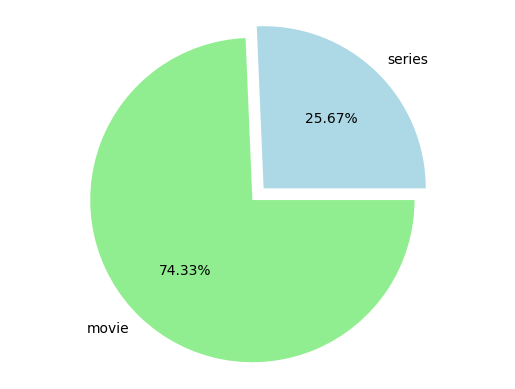

In [8]:
import matplotlib.pyplot as plt
color = ['lightblue', 'lightgreen']
label = ['series', 'movie']
sizes = [df[df['Series or Movie'] == 'Series'].size, df[df['Series or Movie'] == 'Movie'].size]
explode = (0.1, 0)
plt.pie(sizes, explode, label, color, '%2.2f%%')
plt.axis('equal')
plt.show()

data consists of more movies

In [9]:
df.rename(columns={'View Rating': 'ViewerRating'}, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9403 entries, Lets Fight Ghost to Dreamworks Happy Holidays From Madagascar
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Genre                 9378 non-null   object 
 1   Tags                  9366 non-null   object 
 2   Languages             9233 non-null   object 
 3   Country Availability  9392 non-null   object 
 4   Runtime               9402 non-null   object 
 5   Director              7099 non-null   object 
 6   Writer                7596 non-null   object 
 7   Actors                9292 non-null   object 
 8   ViewerRating          6813 non-null   object 
 9   IMDb Score            9395 non-null   float64
 10  Awards Received       5213 non-null   float64
 11  Awards Nominated For  6363 non-null   float64
 12  Boxoffice             3743 non-null   object 
 13  Release Date          9196 non-null   object 
 14  Netflix Release Date  940

In [11]:
lang = df.Languages.str.get_dummies(',')
language = lang.columns.str.strip().values.tolist()
lang = df['Languages']
language_count = dict()
for i in language:
    p = lang.str.count(i).sum()
    language_count[i] = int(p)
print(len(language_count))

184


so there are movies and series of total 184 languages

In [12]:
countries = df['Country Availability'].str.get_dummies(',')
county = countries.columns.str.strip().values.tolist()
countries = df['Country Availability']
country_count = dict()
for i in county:
    p = countries.str.count(i).sum()
    country_count[i] = int(p)
print(len(country_count))

36


all these series and movies are available in total 36 countries

In [13]:
genre = df.Genre.str.get_dummies(',')
gen = genre.columns.str.strip().values.tolist()
genre = df['Genre']
genre_count = dict()
for i in gen:
    p = genre.str.count(i).sum()
    genre_count[i] = int(p)
print(len(genre_count))

28


the dataset consists of total 28 genres

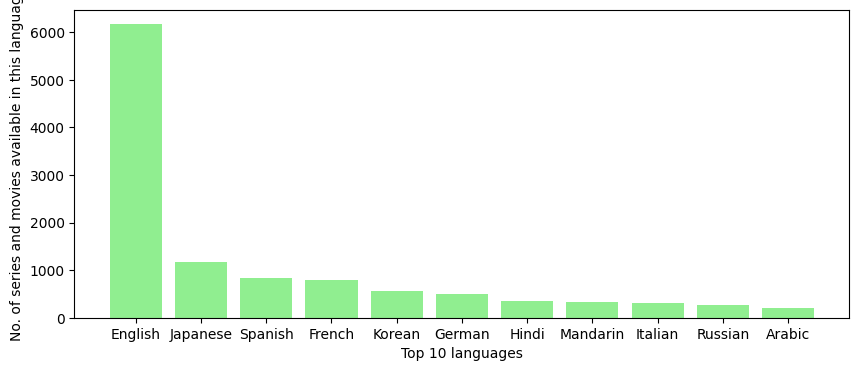

In [14]:
language_count = {k: v for k,v in sorted(language_count.items(), key=lambda item: item[1], reverse=True)}
top_languages = {'Languages': list(language_count.keys()), "count": list(language_count.values())}
top_languages_df = pd.DataFrame(top_languages)
top_10 = top_languages_df[0:11]
plt.figure(figsize=(10,4))
plt.bar(top_10['Languages'], top_10['count'], color='lightgreen')
plt.ylabel('No. of series and movies available in this language')
plt.xlabel('Top 10 languages')
plt.show()

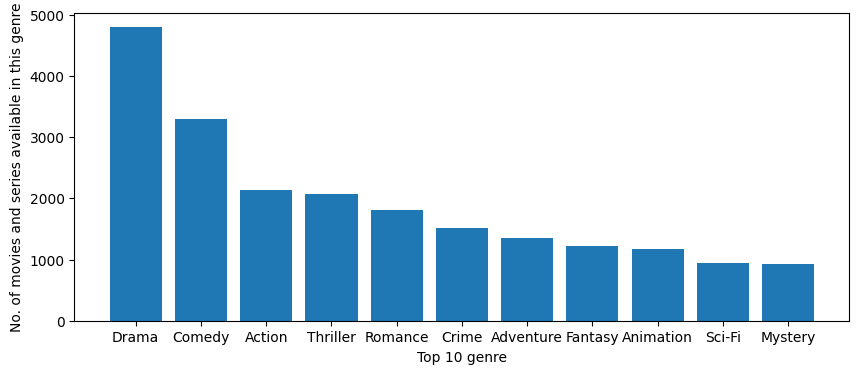

In [15]:
genre_count = {k:v for k,v in sorted(genre_count.items(), key=lambda item: item[1], reverse=True)}
top_genre = {'Genre': list(genre_count.keys()), 'count': list(genre_count.values())}
top_genre_df = pd.DataFrame(top_genre)
top_10 = top_genre_df[0:11]
plt.figure(figsize=(10,4))
plt.bar(top_10['Genre'], top_10['count'])
plt.ylabel('No. of movies and series available in this genre')
plt.xlabel('Top 10 genre')
plt.show()

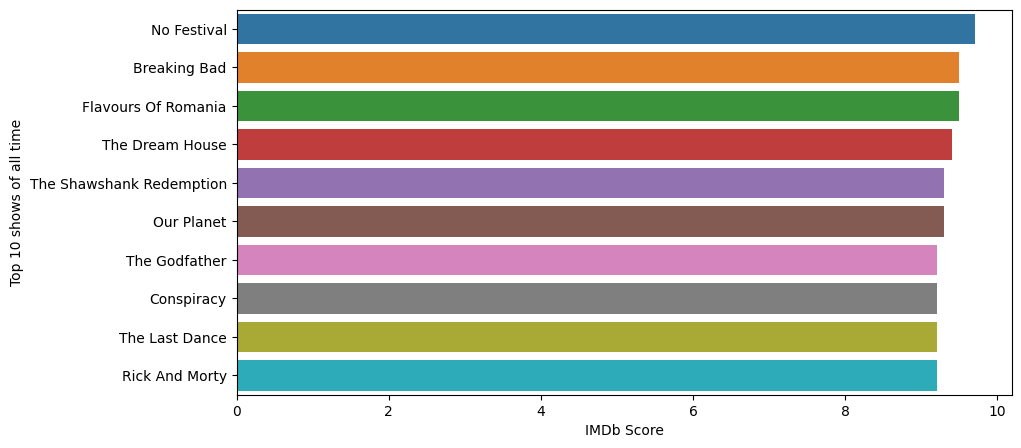

In [16]:
top_10_shows = (df.sort_values(by=['IMDb Score'], ascending=False)).head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top_10_shows, y = top_10_shows.index, x = 'IMDb Score')
plt.ylabel('Top 10 shows of all time')
plt.show()

In [17]:
df.describe()

,IMDb Score,Awards Received,Awards Nominated For,IMDb Votes
count,9395.000000,5213.000000,6363.000000,9.393000e+03
mean,6.954902,9.725878,16.024674,5.992114e+04
std,0.899448,19.526363,32.215336,1.456879e+05
min,1.600000,1.000000,1.000000,5.000000e+00
25%,6.500000,1.000000,2.000000,9.740000e+02
50%,7.000000,4.000000,6.000000,6.602000e+03
75%,7.500000,9.000000,15.000000,5.096900e+04
max,9.700000,300.000000,386.000000,2.354197e+06


In [18]:
df.duplicated().sum()

0

In [19]:
df['Genre'] = df['Genre'].astype(str)
print((df['Genre']=='nan').sum())

25


In [20]:
df['Tags'] = df['Tags'].astype(str)
print((df['Tags']=='nan').sum())

37


Both genre and tags feature has NaN values, but we can use them too

In [21]:
print(((df['Genre'] == 'nan') & (df['Tags'] == 'nan')).sum())
#so these two features can used to recommend movies as no movie can be left unrecommended

0


In [22]:
import math
df['IMDb Score'] = df['IMDb Score'].apply(lambda x: 6.6 if x==0 or math.isnan(x) else x)
# here we applied a lambda function where if the IMDB score is 0 or nan then replace it with a score of 6.6

In [23]:
df['IMDb Score'].describe()

count    9403.000000
mean        6.954600
std         0.899124
min         1.600000
25%         6.500000
50%         7.000000
75%         7.500000
max         9.700000
Name: IMDb Score, dtype: float64

In [24]:
df['IMDb Votes'].isnull().sum()

10

In [25]:
avg_imdb_votes = np.mean(df['IMDb Votes']).round(0)
avg_imdb_votes = avg_imdb_votes.astype(int)
avg_imdb_votes

59921

In [26]:
df['IMDb Votes'] = df['IMDb Votes'].apply(lambda x: avg_imdb_votes if x == 0 or math.isnan(x) else x)
df['IMDb Votes'].isnull().sum()

0

In [27]:
df['IMDb Votes'] = df['IMDb Votes'].astype(int)
df['IMDb Votes']

Title
Lets Fight Ghost                             205926
How To Build A Girl                            2838
The Con-Heartist                                131
Gleboka Woda                                     47
Only A Mother                                    88
                                              ...  
13 Going On 30                               167842
Life 2.0                                        878
Brand New Day                                    14
Daniel Arends: Blessuretijd                     174
Dreamworks Happy Holidays From Madagascar        71
Name: IMDb Votes, Length: 9403, dtype: int32

# popular drama shows

In [28]:
drama_df = df[df['Genre']=='Drama']
popular_drama = drama_df[drama_df['IMDb Votes']> 150000].sort_values('IMDb Score', ascending=False).head(10)
popular_drama

,Genre,Tags,Languages,Country Availability,Runtime,Director,Writer,Actors,ViewerRating,IMDb Score,...,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,Summary,Series or Movie,IMDb Votes,Image
Title,,,,,,,,,,,,,,,,,,,,,
The Shawshank Redemption,Drama,"Dramas,20th Century Period Pieces,Dramas based...",English,"France,Portugal,Belgium,Switzerland,Japan,Spai...",> 2 hrs,Frank Darabont,"Frank Darabont, Stephen King","William Sadler, Bob Gunton, Morgan Freeman, Ti...",R,9.3,...,43.0,"$2,86,99,976",14-Oct-94,14-04-2015,"Columbia Pictures, Castle Rock Entertainment",https://www.netflix.com/watch/70005379,"Framed for murder, upstanding banker Andy Dufr...",Movie,2354197,https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...
House Of Cards,Drama,"US TV Programmes,TV Dramas,TV Programmes,Polit...",English,"Belgium,Switzerland,United States,Canada,Austr...",< 30 minutes,NaN,Beau Willimon,"Michael Kelly, Kevin Spacey, Justin Doescher, ...",TV-MA,8.7,...,215.0,NaN,01-Feb-13,14-04-2015,NaN,https://www.netflix.com/watch/70178217,Ruthless Congressman Frank Underwood will stop...,Series,466163,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...
American History X,Drama,"Dramas,Social Issue Dramas,Crime Dramas,US Movies",English,"Japan,South Africa,United Kingdom,Belgium,Neth...",1-2 hour,Tony Kaye,David McKenna,"Edward Norton, Jennifer Lien, Edward Furlong, ...",R,8.5,...,15.0,"$67,19,864",20-Nov-98,14-04-2015,"New Line Cinema, Turman-Morrissey Company",https://www.netflix.com/watch/18002692,A neo-Nazi gets sent to prison for murder and ...,Movie,1038294,https://occ-0-1926-41.1.nflxso.net/dnm/api/v6/...
The Hunt,Drama,"Action & Adventure,Horror Movies,US Movies","Danish, English, Polish",South Korea,1-2 hour,Thomas Vinterberg,"Tobias Lindholm, Thomas Vinterberg","Mads Mikkelsen, Annika Wedderkopp, Lasse Fogel...",R,8.3,...,70.0,"$6,13,308",10-Jan-13,24-01-2021,Zentropa Entertainments,https://www.netflix.com/watch/81087735,"In this dark horror satire, wealthy elites hun...",Movie,282998,https://occ-0-1361-988.1.nflxso.net/dnm/api/v6...
Requiem For A Dream,Drama,"Independent Dramas,Dramas,Independent Films,Dr...",English,"Lithuania,Russia,Hungary,Czech Republic,Poland...",1-2 hour,Darren Aronofsky,"Darren Aronofsky, Hubert Selby Jr.","Marlon Wayans, Ellen Burstyn, Jennifer Connell...",R,8.3,...,70.0,"$36,35,482",15-Dec-00,14-04-2015,"Thousand Words, Industry Entertainment, Truth ...",https://www.netflix.com/watch/60001134,A widows growing dependence on amphetamines an...,Movie,768597,https://occ-0-1168-299.1.nflxso.net/dnm/api/v6...
American Beauty,Drama,"Dramas,US Movies",English,"South Korea,Japan,Switzerland,India,United Kin...",> 2 hrs,Sam Mendes,Alan Ball,"Wes Bentley, Thora Birch, Kevin Spacey, Annett...",R,8.3,...,102.0,"$13,00,96,601",01-Oct-99,14-04-2015,"DreamWorks Pictures, Jinks/Cohen Company",https://www.netflix.com/watch/60000407,While struggling to endure his tightly wound w...,Movie,1072221,https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...
There Will Be Blood,Drama,"Independent Dramas,Dramas,Independent Films,Ep...","English, American Sign Language",United States,> 2 hrs,Paul Thomas Anderson,"Paul Thomas Anderson, Upton Sinclair","Martin Stringer, Matthew Braden Stringer, Dani...",R,8.2,...,136.0,"$4,02,22,514",25-Jan-08,14-04-2015,"Scott Rudin Productions, Ghoulardi Film Compan...",https://www.netflix.com/watch/70075473,An ambitious prospector strikes it rich and tu...,Movie,519905,https://occ-0-768-769.1.nflxso.net/dnm/api/v6/...
Trainspotting,Drama,"Independent Dramas,Dramas,Independent Films,Cu...",English,Japan,1-2 hour,Danny Boyle,"John Hodge, Irvine Welsh","Jonny Lee Miller, Ewan McGregor, Kevin McKidd,...",R,8.1,...,35.0,"$1,64,91,080",09-Aug-96,14-04-2015,"Figment Films, Noel Gay Motion Picture Company...",https://www.netflix.com/watch/60037022,Renton and his mates cope with the gritty real...,Movie,635870,https://occ-0-1007-1360.1.nflxso.net/dnm/api/v...
Gran Torino,Drama,"Dramas,A

In [29]:
names = []
imdb = []
for k,v in popular_drama.items():
    if k =='Genre':
        names.append(v)
for a,b in popular_drama.items():
    if a == 'IMDb Score':
        imdb.append(b)
merged_list = names + imdb
drama_merged = pd.DataFrame(merged_list)
drama_merged


Title,The Shawshank Redemption,House Of Cards,American History X,The Hunt,Requiem For A Dream,American Beauty,There Will Be Blood,Trainspotting,Gran Torino,Scent Of A Woman
Genre,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama
IMDb Score,9.3,8.7,8.5,8.3,8.3,8.3,8.2,8.1,8.1,8.0


# Weighted Popularity Score=w×IMDb Votes+(1−w)×IMDb Score

In [30]:
'''

w = 0.3
wps = w * drama_df[drama_df['Genre']=='Drama']['IMDb Votes'] + (1-w) * drama_df[drama_df['Genre']=='Drama']['IMDb Score']
wps.sort_values(ascending=False)[0:25]
top_drama_shows = pd.DataFrame(wps.sort_values(ascending=False)[0:20])
top_drama_shows = top_drama_shows.drop_duplicates(keep='first')
top_drama_shows_list = ['The Shawshank Redemption', 'American Beauty', 'American History X', 'Requiem For A Dream', 'Gran Torino',
                  'Trainspotting', 'There Will Be Blood', 'Rain Man', 'House Of Cards', 'The Help', 'Magnolia', 'Babel', 'Seven Pounds',
                     'The Hunt', 'Moonlight', 'Scent Of A Woman', 'Manchester By The Sea', 'Whats Eating Gilbert Grape']

user = input('enter.. ').lower()
if user == 'drama':
    print('here are the top 20 drama recommendations')
    for i in top_drama_shows_list:
        print(i)
        
        '''

"\n\nw = 0.3\nwps = w * drama_df[drama_df['Genre']=='Drama']['IMDb Votes'] + (1-w) * drama_df[drama_df['Genre']=='Drama']['IMDb Score']\nwps.sort_values(ascending=False)[0:25]\ntop_drama_shows = pd.DataFrame(wps.sort_values(ascending=False)[0:20])\ntop_drama_shows = top_drama_shows.drop_duplicates(keep='first')\ntop_drama_shows_list = ['The Shawshank Redemption', 'American Beauty', 'American History X', 'Requiem For A Dream', 'Gran Torino',\n                  'Trainspotting', 'There Will Be Blood', 'Rain Man', 'House Of Cards', 'The Help', 'Magnolia', 'Babel', 'Seven Pounds',\n                     'The Hunt', 'Moonlight', 'Scent Of A Woman', 'Manchester By The Sea', 'Whats Eating Gilbert Grape']\n\nuser = input('enter.. ').lower()\nif user == 'drama':\n    print('here are the top 20 drama recommendations')\n    for i in top_drama_shows_list:\n        print(i)\n        \n        "

# popular comedy shows

In [31]:
comedy_df = df[df['Genre']=='Comedy']
popular_comedy = comedy_df[comedy_df['IMDb Votes']> 150000].sort_values('IMDb Score', ascending=False).head(10)
names = []
imdb = []
for k,v in popular_comedy.items():
    if k =='Genre':
        names.append(v)
for a,b in popular_comedy.items():
    if a == 'IMDb Score':
        imdb.append(b)
merged_list = names + imdb
comedy_merged = pd.DataFrame(merged_list)
comedy_merged

Title,The Office (U.S.),Its Always Sunny In Philadelphia,Arrested Development,Parks And Recreation,Community,Monty Pythons Life Of Brian,Ferris Buellers Day Off,Office Space,New Girl,The Hangover
Genre,Comedy,Comedy,Comedy,Comedy,Comedy,Comedy,Comedy,Comedy,Comedy,Comedy
IMDb Score,8.9,8.8,8.7,8.6,8.5,8.1,7.8,7.7,7.7,7.7


# popular action shows

In [32]:
action_df = df[df['Genre']=='Action']
popular_action = action_df[action_df['IMDb Score']> 6].head(10) # since we have less data for action shows
names = []
imdb = []
for k,v in popular_action.items():
    if k =='Genre':
        names.append(v)
for a,b in popular_action.items():
    if a == 'IMDb Score':
        imdb.append(b)
merged_list = names + imdb
action_merged = pd.DataFrame(merged_list)
action_merged

Title,The Crown Princess,The Deed Of Death,Doubutsu Sentai Zyuohger Returns: Give Me Your Life! Earth Champion Tournament,Confidential Assignment,Polis Evo,Polis Evo 2,Kamen Rider × Super Sentai: Chou Super Hero Taisen,Zyuohger Vs. Ninninger The Movie,Public Enemy,My True Friend
Genre,Action,Action,Action,Action,Action,Action,Action,Action,Action,Action
IMDb Score,8.4,6.6,6.7,6.6,6.9,7.1,6.7,6.7,7.2,6.6


# popular thriller shows

In [33]:
thriller_df = df[df['Genre']=='Thriller']
popular_thriller = thriller_df[thriller_df['IMDb Score']> 6.2].head(10)
names = []
imdb = []
for k,v in popular_thriller.items():
    if k =='Genre':
        names.append(v)
for a,b in popular_thriller.items():
    if a == 'IMDb Score':
        imdb.append(b)
merged_list = names + imdb
thriller_merged = pd.DataFrame(merged_list)
thriller_merged

Title,The Dig,Cheat,Out Of Love,The Royal Bengal Tiger,Zero Distance,Escape From Pretoria,40 Sticks,Reckoning,Door Lock,Traitors
Genre,Thriller,Thriller,Thriller,Thriller,Thriller,Thriller,Thriller,Thriller,Thriller,Thriller
IMDb Score,6.3,6.7,7.1,6.9,7.0,6.8,6.8,6.6,6.3,6.6


# popular romance shows 

In [34]:
rom_df = df[df['Genre']=='Romance']
popular_rom = rom_df[rom_df['IMDb Score']> 7].sort_values('IMDb Score', ascending=False).head(10)
names = []
imdb = []
for k,v in popular_rom.items():
    if k =='Genre':
        names.append(v)
for a,b in popular_rom.items():
    if a == 'IMDb Score':
        imdb.append(b)
merged_list = names + imdb
rom_merged = pd.DataFrame(merged_list)
rom_merged

Title,Zindagi Gulzar Hai,Gaya Sa Pelikula,"Wait, My Youth","Crazy, Lovely, Cool",Love By Chance,My Dear Boy,Romance Is A Bonus Book,Khaani,Kaakan,Memory Love
Genre,Romance,Romance,Romance,Romance,Romance,Romance,Romance,Romance,Romance,Romance
IMDb Score,8.9,8.7,8.6,8.1,8.1,8.1,8.1,8.0,8.0,8.0


# popular crime shows

In [35]:
crime_df = df[df['Genre']=='Crime']
popular_crime = crime_df[crime_df['IMDb Score']> 6.9].head(10)
names = []
imdb = []
for k,v in popular_crime.items():
    if k =='Genre':
        names.append(v)
for a,b in popular_crime.items():
    if a == 'IMDb Score':
        imdb.append(b)
merged_list = names + imdb
crime_merged = pd.DataFrame(merged_list)
crime_merged

Title,Paradoks,Prokurator,Al Acecho,The State-Mafia Pact,Jamtara - Sabka Number Ayega,Hollands Hoop,The Trial,The Defected,Crime Diaries: Night Out,Friesland
Genre,Crime,Crime,Crime,Crime,Crime,Crime,Crime,Crime,Crime,Crime
IMDb Score,7.0,7.0,7.6,7.0,7.3,8.0,7.0,7.3,7.3,7.1


# As we don't have enough data for adventure genre so we are skipping it and using horror genre instead

# popular horror shows

In [36]:
horror_df = df[df['Genre']=='Horror']
popular_horror = horror_df[horror_df['IMDb Score']> 6.5].head(10)
names = []
imdb = []
for k,v in popular_horror.items():
    if k =='Genre':
        names.append(v)
for a,b in popular_horror.items():
    if a == 'IMDb Score':
        imdb.append(b)
merged_list = names + imdb
horror_merged = pd.DataFrame(merged_list)
horror_merged

Title,"Its Me, Its Me",The Ghost Of Yotsuya,Munafik,Its Her Day,Hole In The Wall,Prince Of Darkness,Its Okay To Not Be Okay,Üç Harfliler 3: Karabüyü,Its The Law,"Its Okay, Buddy"
Genre,Horror,Horror,Horror,Horror,Horror,Horror,Horror,Horror,Horror,Horror
IMDb Score,7.3,7.0,6.9,7.3,8.9,6.7,7.3,6.6,7.3,7.3


# as we dont have enough data for fantasy genre so we are skipping it with animation

# popular animation shows

In [37]:
anim_df = df[df['Genre']=='Animation']
popular_anim = anim_df[anim_df['IMDb Score'] > 7.4].head(10)
names = []
imdb = []
for k,v in popular_anim.items():
    if k =='Genre':
        names.append(v)
for a,b in popular_anim.items():
    if a == 'IMDb Score':
        imdb.append(b)
merged_list = names + imdb
anim_merged = pd.DataFrame(merged_list)
anim_merged

Title,Geez & Ann,Go Dog Go,The Treflik Family,Bread Barbershop,Gigantosaurus,Saladin,Numberblocks,Alphablocks,A Truthful Mother,Animanimals
Genre,Animation,Animation,Animation,Animation,Animation,Animation,Animation,Animation,Animation,Animation
IMDb Score,8.0,8.4,8.5,8.5,7.5,8.6,9.0,7.5,8.2,7.6


# popular sci-fi shows

In [38]:
scifi_df = df[df['Genre']=='Sci-Fi']
popular_scifi = scifi_df[scifi_df['IMDb Score'] > 4]
names = []
imdb = []
for k,v in popular_scifi.items():
    if k =='Genre':
        names.append(v)
for a,b in popular_scifi.items():
    if a == 'IMDb Score':
        imdb.append(b)
merged_list = names + imdb
scifi_merged = pd.DataFrame(merged_list)
scifi_merged

Title,Mystic,Voyage To The End Of The Universe,Clara,Toki O Kakeru Shôjo
Genre,Sci-Fi,Sci-Fi,Sci-Fi,Sci-Fi
IMDb Score,7.4,7.0,6.7,8.3


# popular mystery shows

In [39]:
mys_df = df[df['Genre']=='Mystery'].head(10)
names = []
imdb = []
for k,v in mys_df.items():
    if k =='Genre':
        names.append(v)
for a,b in mys_df.items():
    if a == 'IMDb Score':
        imdb.append(b)
merged_list = names + imdb
mystery_merged = pd.DataFrame(merged_list)
mystery_merged

Title,Emergency Interrogation Room,The Grooms Price,Non-Core,Midsummers Equation,Unfair
Genre,Mystery,Mystery,Mystery,Mystery,Mystery
IMDb Score,6.9,7.8,6.6,6.6,7.2


................All the merged dataframes..............

In [40]:
def drama():
    print('Here are the top recommendations')
    for a,b in drama_merged.items():
        print('Name:', a)
        genre = b['Genre']
        imdb_score = b['IMDb Score']
        print('Genre:', genre)
        print('IMDb Score:', imdb_score)
    
def comedy():
    print('Here are the top recommendations')
    for a,b in comedy_merged.items():
        print('Name:', a)
        genre = b['Genre']
        imdb_score = b['IMDb Score']
        print('Genre:', genre)
        print('IMDb Score:', imdb_score)

def action():
    print('Here are the top recommendations')
    for a,b in action_merged.items():
        print('Name:', a)
        genre = b['Genre']
        imdb_score = b['IMDb Score']
        print('Genre:', genre)
        print('IMDb Score:', imdb_score)

def thriller():
    print('Here are the top recommendations')
    for a,b in thriller_merged.items():
        print('Name:', a)
        genre = b['Genre']
        imdb_score = b['IMDb Score']
        print('Genre:', genre)
        print('IMDb Score:', imdb_score)

def romance():
    print('Here are the top recommendations')
    for a,b in rom_merged.items():
        print('Name:', a)
        genre = b['Genre']
        imdb_score = b['IMDb Score']
        print('Genre:', genre)
        print('IMDb Score:', imdb_score)
        
def crime():
    print('Here are the top recommendations')
    for a,b in crime_merged.items():
        print('Name:', a)
        genre = b['Genre']
        imdb_score = b['IMDb Score']
        print('Genre:', genre)
        print('IMDb Score:', imdb_score)
        
def horror():
    print('Here are the top recommendations')
    for a,b in horror_merged.items():
        print('Name:', a)
        genre = b['Genre']
        imdb_score = b['IMDb Score']
        print('Genre:', genre)
        print('IMDb Score:', imdb_score)
        
def animation():
    print('Here are the top recommendations')
    for a,b in anim_merged.items():
        print('Name:', a)
        genre = b['Genre']
        imdb_score = b['IMDb Score']
        print('Genre:', genre)
        print('IMDb Score:', imdb_score)
        
def scifi():
    print('Here are the top recommendations')
    for a,b in scifi_merged.items():
        print('Name:', a)
        genre = b['Genre']
        imdb_score = b['IMDb Score']
        print('Genre:', genre)
        print('IMDb Score:', imdb_score)

def mystery():
    print('Here are the top recommendations')
    for a,b in mystery_merged.items():
        print('Name:', a)
        genre = b['Genre']
        imdb_score = b['IMDb Score']
        print('Genre:', genre)
        print('IMDb Score:', imdb_score)


user = input('Enter the genre you like.... ').lower()
if user == 'drama':
    drama()
elif user == 'comedy':
    comedy()
elif user == 'action':
    action()
elif user == 'thriller':
    thriller()
elif user == 'romance':
    romance()
elif user == 'crime':
    crime()
elif user == 'horror':
    horror()
elif user == 'animation':
    animation()
elif user == 'scifi' or user == 'sci-fi':
    scifi()
else:
    mystery()

Enter the genre you like.... drama
Here are the top recommendations
Name: The Shawshank Redemption
Genre: Drama
IMDb Score: 9.3
Name: House Of Cards
Genre: Drama
IMDb Score: 8.7
Name: American History X
Genre: Drama
IMDb Score: 8.5
Name: The Hunt
Genre: Drama
IMDb Score: 8.3
Name: Requiem For A Dream
Genre: Drama
IMDb Score: 8.3
Name: American Beauty
Genre: Drama
IMDb Score: 8.3
Name: There Will Be Blood
Genre: Drama
IMDb Score: 8.2
Name: Trainspotting
Genre: Drama
IMDb Score: 8.1
Name: Gran Torino
Genre: Drama
IMDb Score: 8.1
Name: Scent Of A Woman
Genre: Drama
IMDb Score: 8.0


# saving all the popular dataframes into csv file for later use

In [41]:
# drama_merged.to_csv('popular_drama.csv')

In [42]:
'''
comedy_merged.to_csv('popular_comedy.csv')
action_merged.to_csv('popular_action.csv')
thriller_merged.to_csv('popular_thriller.csv')
rom_merged.to_csv('popular_romance.csv')
crime_merged.to_csv('popular_crime.csv')
horror_merged.to_csv('popular_horror.csv')
anim_merged.to_csv('popular_animation.csv')
scifi_merged.to_csv('popular_scifi.csv')
mystery_merged.to_csv('popular_mystery.csv')
'''

"\ncomedy_merged.to_csv('popular_comedy.csv')\naction_merged.to_csv('popular_action.csv')\nthriller_merged.to_csv('popular_thriller.csv')\nrom_merged.to_csv('popular_romance.csv')\ncrime_merged.to_csv('popular_crime.csv')\nhorror_merged.to_csv('popular_horror.csv')\nanim_merged.to_csv('popular_animation.csv')\nscifi_merged.to_csv('popular_scifi.csv')\nmystery_merged.to_csv('popular_mystery.csv')\n"

In [43]:
import pickle
pickle.dump(drama_merged, open('dramaMovies.pkl', 'wb'))

In [44]:
pickle.dump(comedy_merged, open('comedyMovies.pkl', 'wb'))

In [45]:
pickle.dump(action_merged, open('actionMovies.pkl', 'wb'))
pickle.dump(thriller_merged, open('thrillerMovies.pkl', 'wb'))
pickle.dump(rom_merged, open('romMovies.pkl', 'wb'))
pickle.dump(crime_merged, open('crimeMovies.pkl', 'wb'))
pickle.dump(horror_merged, open('horrorMovies.pkl', 'wb'))
pickle.dump(anim_merged, open('animMovies.pkl', 'wb'))
pickle.dump(scifi_merged, open('scifiMovies.pkl', 'wb'))
pickle.dump(mystery_merged, open('mysteryMovies.pkl', 'wb'))